In [41]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Read the csv file
clean_df = pd.read_csv("clean_concussion_2012_2014.csv")
clean_df

,Unnamed: 0,Player,Team,Game,Date,Opposing Team,Position,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
0,0,Aldrick Robinson,Washington Redskins,Washington Redskins vs. Tampa Bay Buccaneers (...,30/09/2012,Tampa Bay Buccaneers,Wide Receiver,No,Yes,4,2012/2013,1,1.0,No,Head,0,14 downs,37.00 downs
1,1,D.J. Fluker,San Diego Chargers,Tennessee Titans vs. San Diego Chargers (22/9/...,22/09/2013,Tennessee Titans,Offensive Tackle,No,No,3,2013/2014,1,1.0,No,Concussion,0,78 downs,73.50 downs
2,2,Marquise Goodwin,Buffalo Bills,Houston Texans vs. Buffalo Bills (28/9/2014),28/09/2014,Houston Texans,Wide Receiver,No,No,4,2014/2015,1,1.0,No,Concussion,0,25 downs,17.50 downs
3,3,Bryan Stork,New England Patriots,New England Patriots vs. Buffalo Bills (12/10/...,12/10/2014,Buffalo Bills,Center,No,Yes,6,2014/2015,1,1.0,No,Head,0,82 downs,41.50 downs
4,16,Daniel Kilgore,San Francisco 49ers,San Francisco 49ers vs. Arizona Cardinals (29/...,29/10/2012,Arizona Cardinals,Guard,No,Yes,8,2012/2013,1,0.0,No,Concussion,1,8 downs,14.43 downs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,387,Eric Weddle,San Diego Chargers,Baltimore Ravens vs. San Diego Chargers (25/11...,25/11/2012,Baltimore Ravens,Safety,No,No,12,2012/2013,1,0.0,No,Concussion,85,90 downs,76.00 downs
321,388,Blidi Wreh-Wilson,Tennessee Titans,Indianapolis Colts vs. Tennessee Titans (28/9/...,28/09/2014,Indianapolis Colts,Comerback,No,No,4,2014/2015,1,1.0,No,Concussion,85,90 downs,78.00 downs
322,389,Josh Sitton,Green Bay Packers,Green Bay Packers vs. Tennessee Titans (23/12/...,23/12/2012,Tennessee Titans,Guard,No,Yes,16,2012/2013,1,0.0,No,Concussion,87,70 downs,73.64 downs
323,390,Nate Solder,New England Patriots,New England Patriots vs. Cleveland Browns (8/1...,8/12/2013,Cleveland Browns,Offensive Tackle,No,Yes,14,2013/2014,1,0.0,No,Concussion,87,52 downs,78.83 downs


In [4]:
# List number of players per positions on offense and defense
clean_df["Position"].value_counts()

Comerback           52
Wide Receiver       45
Safety              41
Tight End           35
Running Back        33
Linebacker          25
Guard               24
Defensive End       18
Offensive Tackle    17
Defensive Tackle    13
Quarterback         12
Center               7
Full Back            3
Name: Position, dtype: int64

In [5]:
# comerback is mispelled.  Correct the mispelling
clean_df = clean_df.replace(to_replace="Comerback", value="Cornerback")
clean_df["Position"].value_counts()

Cornerback          52
Wide Receiver       45
Safety              41
Tight End           35
Running Back        33
Linebacker          25
Guard               24
Defensive End       18
Offensive Tackle    17
Defensive Tackle    13
Quarterback         12
Center               7
Full Back            3
Name: Position, dtype: int64

In [6]:
# Change the season column values 
clean_df = clean_df.replace(to_replace="2012/2013", value="2012")
clean_df = clean_df.replace(to_replace="2013/2014", value="2013")
clean_df = clean_df.replace(to_replace="2014/2015", value="2014")

In [7]:
clean_df

,Unnamed: 0,Player,Team,Game,Date,Opposing Team,Position,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
0,0,Aldrick Robinson,Washington Redskins,Washington Redskins vs. Tampa Bay Buccaneers (...,30/09/2012,Tampa Bay Buccaneers,Wide Receiver,No,Yes,4,2012,1,1.0,No,Head,0,14 downs,37.00 downs
1,1,D.J. Fluker,San Diego Chargers,Tennessee Titans vs. San Diego Chargers (22/9/...,22/09/2013,Tennessee Titans,Offensive Tackle,No,No,3,2013,1,1.0,No,Concussion,0,78 downs,73.50 downs
2,2,Marquise Goodwin,Buffalo Bills,Houston Texans vs. Buffalo Bills (28/9/2014),28/09/2014,Houston Texans,Wide Receiver,No,No,4,2014,1,1.0,No,Concussion,0,25 downs,17.50 downs
3,3,Bryan Stork,New England Patriots,New England Patriots vs. Buffalo Bills (12/10/...,12/10/2014,Buffalo Bills,Center,No,Yes,6,2014,1,1.0,No,Head,0,82 downs,41.50 downs
4,16,Daniel Kilgore,San Francisco 49ers,San Francisco 49ers vs. Arizona Cardinals (29/...,29/10/2012,Arizona Cardinals,Guard,No,Yes,8,2012,1,0.0,No,Concussion,1,8 downs,14.43 downs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,387,Eric Weddle,San Diego Chargers,Baltimore Ravens vs. San Diego Chargers (25/11...,25/11/2012,Baltimore Ravens,Safety,No,No,12,2012,1,0.0,No,Concussion,85,90 downs,76.00 downs
321,388,Blidi Wreh-Wilson,Tennessee Titans,Indianapolis Colts vs. Tennessee Titans (28/9/...,28/09/2014,Indianapolis Colts,Cornerback,No,No,4,2014,1,1.0,No,Concussion,85,90 downs,78.00 downs
322,389,Josh Sitton,Green Bay Packers,Green Bay Packers vs. Tennessee Titans (23/12/...,23/12/2012,Tennessee Titans,Guard,No,Yes,16,2012,1,0.0,No,Concussion,87,70 downs,73.64 downs
323,390,Nate Solder,New England Patriots,New England Patriots vs. Cleveland Browns (8/1...,8/12/2013,Cleveland Browns,Offensive Tackle,No,Yes,14,2013,1,0.0,No,Concussion,87,52 downs,78.83 downs


In [8]:
# Drop the unwanted column
clean_df = clean_df.drop(["Unnamed: 0"], axis=1)

In [9]:
clean_df

,Player,Team,Game,Date,Opposing Team,Position,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
0,Aldrick Robinson,Washington Redskins,Washington Redskins vs. Tampa Bay Buccaneers (...,30/09/2012,Tampa Bay Buccaneers,Wide Receiver,No,Yes,4,2012,1,1.0,No,Head,0,14 downs,37.00 downs
1,D.J. Fluker,San Diego Chargers,Tennessee Titans vs. San Diego Chargers (22/9/...,22/09/2013,Tennessee Titans,Offensive Tackle,No,No,3,2013,1,1.0,No,Concussion,0,78 downs,73.50 downs
2,Marquise Goodwin,Buffalo Bills,Houston Texans vs. Buffalo Bills (28/9/2014),28/09/2014,Houston Texans,Wide Receiver,No,No,4,2014,1,1.0,No,Concussion,0,25 downs,17.50 downs
3,Bryan Stork,New England Patriots,New England Patriots vs. Buffalo Bills (12/10/...,12/10/2014,Buffalo Bills,Center,No,Yes,6,2014,1,1.0,No,Head,0,82 downs,41.50 downs
4,Daniel Kilgore,San Francisco 49ers,San Francisco 49ers vs. Arizona Cardinals (29/...,29/10/2012,Arizona Cardinals,Guard,No,Yes,8,2012,1,0.0,No,Concussion,1,8 downs,14.43 downs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Eric Weddle,San Diego Chargers,Baltimore Ravens vs. San Diego Chargers (25/11...,25/11/2012,Baltimore Ravens,Safety,No,No,12,2012,1,0.0,No,Concussion,85,90 downs,76.00 downs
321,Blidi Wreh-Wilson,Tennessee Titans,Indianapolis Colts vs. Tennessee Titans (28/9/...,28/09/2014,Indianapolis Colts,Cornerback,No,No,4,2014,1,1.0,No,Concussion,85,90 downs,78.00 downs
322,Josh Sitton,Green Bay Packers,Green Bay Packers vs. Tennessee Titans (23/12/...,23/12/2012,Tennessee Titans,Guard,No,Yes,16,2012,1,0.0,No,Concussion,87,70 downs,73.64 downs
323,Nate Solder,New England Patriots,New England Patriots vs. Cleveland Browns (8/1...,8/12/2013,Cleveland Browns,Offensive Tackle,No,Yes,14,2013,1,0.0,No,Concussion,87,52 downs,78.83 downs


In [10]:
# Add another column that will show the team classification of a position
clean_df["Team Type"] = ""

In [11]:
clean_df

,Player,Team,Game,Date,Opposing Team,Position,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury,Team Type
0,Aldrick Robinson,Washington Redskins,Washington Redskins vs. Tampa Bay Buccaneers (...,30/09/2012,Tampa Bay Buccaneers,Wide Receiver,No,Yes,4,2012,1,1.0,No,Head,0,14 downs,37.00 downs,
1,D.J. Fluker,San Diego Chargers,Tennessee Titans vs. San Diego Chargers (22/9/...,22/09/2013,Tennessee Titans,Offensive Tackle,No,No,3,2013,1,1.0,No,Concussion,0,78 downs,73.50 downs,
2,Marquise Goodwin,Buffalo Bills,Houston Texans vs. Buffalo Bills (28/9/2014),28/09/2014,Houston Texans,Wide Receiver,No,No,4,2014,1,1.0,No,Concussion,0,25 downs,17.50 downs,
3,Bryan Stork,New England Patriots,New England Patriots vs. Buffalo Bills (12/10/...,12/10/2014,Buffalo Bills,Center,No,Yes,6,2014,1,1.0,No,Head,0,82 downs,41.50 downs,
4,Daniel Kilgore,San Francisco 49ers,San Francisco 49ers vs. Arizona Cardinals (29/...,29/10/2012,Arizona Cardinals,Guard,No,Yes,8,2012,1,0.0,No,Concussion,1,8 downs,14.43 downs,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Eric Weddle,San Diego Chargers,Baltimore Ravens vs. San Diego Chargers (25/11...,25/11/2012,Baltimore Ravens,Safety,No,No,12,2012,1,0.0,No,Concussion,85,90 downs,76.00 downs,
321,Blidi Wreh-Wilson,Tennessee Titans,Indianapolis Colts vs. Tennessee Titans (28/9/...,28/09/2014,Indianapolis Colts,Cornerback,No,No,4,2014,1,1.0,No,Concussion,85,90 downs,78.00 downs,
322,Josh Sitton,Green Bay Packers,Green Bay Packers vs. Tennessee Titans (23/12/...,23/12/2012,Tennessee Titans,Guard,No,Yes,16,2012,1,0.0,No,Concussion,87,70 downs,73.64 downs,
323,Nate Solder,New England Patriots,New England Patriots vs. Cleveland Browns (8/1...,8/12/2013,Cleveland Browns,Offensive Tackle,No,Yes,14,2013,1,0.0,No,Concussion,87,52 downs,78.83 downs,


In [12]:
# list the columns
list(clean_df.columns)

['Player',
 'Team',
 'Game',
 'Date',
 'Opposing Team',
 'Position',
 'Pre-Season Injury?',
 'Winning Team?',
 'Week of Injury',
 'Season',
 'Weeks Injured',
 'Games Missed',
 'Unknown Injury?',
 'Reported Injury Type',
 'Total Snaps',
 'Play Time After Injury',
 'Average Playtime Before Injury',
 'Team Type']

In [13]:
# Rearrange the columns to have "Team Type" next to "Position"
clean_df = clean_df[["Player", 
                     "Team", 
                     "Game", 
                     "Date", 
                     "Opposing Team", 
                     "Position", 
                     "Team Type",
                     "Pre-Season Injury?",
                     "Winning Team?",
                     "Week of Injury",
                     "Season",
                     "Weeks Injured",
                     "Games Missed",
                     "Unknown Injury?",
                     "Reported Injury Type",
                     "Total Snaps",
                     "Play Time After Injury",
                     "Average Playtime Before Injury",                  
                    ]]

In [14]:
clean_df.head()

,Player,Team,Game,Date,Opposing Team,Position,Team Type,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
0,Aldrick Robinson,Washington Redskins,Washington Redskins vs. Tampa Bay Buccaneers (...,30/09/2012,Tampa Bay Buccaneers,Wide Receiver,,No,Yes,4,2012,1,1.0,No,Head,0,14 downs,37.00 downs
1,D.J. Fluker,San Diego Chargers,Tennessee Titans vs. San Diego Chargers (22/9/...,22/09/2013,Tennessee Titans,Offensive Tackle,,No,No,3,2013,1,1.0,No,Concussion,0,78 downs,73.50 downs
2,Marquise Goodwin,Buffalo Bills,Houston Texans vs. Buffalo Bills (28/9/2014),28/09/2014,Houston Texans,Wide Receiver,,No,No,4,2014,1,1.0,No,Concussion,0,25 downs,17.50 downs
3,Bryan Stork,New England Patriots,New England Patriots vs. Buffalo Bills (12/10/...,12/10/2014,Buffalo Bills,Center,,No,Yes,6,2014,1,1.0,No,Head,0,82 downs,41.50 downs
4,Daniel Kilgore,San Francisco 49ers,San Francisco 49ers vs. Arizona Cardinals (29/...,29/10/2012,Arizona Cardinals,Guard,,No,Yes,8,2012,1,0.0,No,Concussion,1,8 downs,14.43 downs


In [15]:
# To know the "Team Type" (offense or defense), I have to list the unique values on "Position"
list(clean_df["Position"].unique())

['Wide Receiver',
 'Offensive Tackle',
 'Center',
 'Guard',
 'Tight End',
 'Defensive End',
 'Running Back',
 'Safety',
 'Cornerback',
 'Linebacker',
 'Defensive Tackle',
 'Quarterback',
 'Full Back']

In [16]:
# Indicate whether the team position is offense or defense. 
clean_df.loc[clean_df["Position"] == "Wide Receiver", "Team Type"] = "offense"
clean_df.loc[clean_df["Position"] == "Offensive Tackle", "Team Type"] = "offense"
clean_df.loc[clean_df["Position"] == "Center", "Team Type"] = "offense"
clean_df.loc[clean_df["Position"] == "Guard", "Team Type"] = "offense"
clean_df.loc[clean_df["Position"] == "Tight End", "Team Type"] = "offense"
clean_df.loc[clean_df["Position"] == "Defensive End", "Team Type"] = "defense"
clean_df.loc[clean_df["Position"] == "Running Back", "Team Type"] = "offense"
clean_df.loc[clean_df["Position"] == "Safety", "Team Type"] = "defense"
clean_df.loc[clean_df["Position"] == "Cornerback", "Team Type"] = "defense"
clean_df.loc[clean_df["Position"] == "Linebacker", "Team Type"] = "defense"
clean_df.loc[clean_df["Position"] == "Defensive Tackle", "Team Type"] = "defense"
clean_df.loc[clean_df["Position"] == "Quarterback", "Team Type"] = "offense"
clean_df.loc[clean_df["Position"] == "Full Back", "Team Type"] = "offense"

In [17]:
clean_df

,Player,Team,Game,Date,Opposing Team,Position,Team Type,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
0,Aldrick Robinson,Washington Redskins,Washington Redskins vs. Tampa Bay Buccaneers (...,30/09/2012,Tampa Bay Buccaneers,Wide Receiver,offense,No,Yes,4,2012,1,1.0,No,Head,0,14 downs,37.00 downs
1,D.J. Fluker,San Diego Chargers,Tennessee Titans vs. San Diego Chargers (22/9/...,22/09/2013,Tennessee Titans,Offensive Tackle,offense,No,No,3,2013,1,1.0,No,Concussion,0,78 downs,73.50 downs
2,Marquise Goodwin,Buffalo Bills,Houston Texans vs. Buffalo Bills (28/9/2014),28/09/2014,Houston Texans,Wide Receiver,offense,No,No,4,2014,1,1.0,No,Concussion,0,25 downs,17.50 downs
3,Bryan Stork,New England Patriots,New England Patriots vs. Buffalo Bills (12/10/...,12/10/2014,Buffalo Bills,Center,offense,No,Yes,6,2014,1,1.0,No,Head,0,82 downs,41.50 downs
4,Daniel Kilgore,San Francisco 49ers,San Francisco 49ers vs. Arizona Cardinals (29/...,29/10/2012,Arizona Cardinals,Guard,offense,No,Yes,8,2012,1,0.0,No,Concussion,1,8 downs,14.43 downs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Eric Weddle,San Diego Chargers,Baltimore Ravens vs. San Diego Chargers (25/11...,25/11/2012,Baltimore Ravens,Safety,defense,No,No,12,2012,1,0.0,No,Concussion,85,90 downs,76.00 downs
321,Blidi Wreh-Wilson,Tennessee Titans,Indianapolis Colts vs. Tennessee Titans (28/9/...,28/09/2014,Indianapolis Colts,Cornerback,defense,No,No,4,2014,1,1.0,No,Concussion,85,90 downs,78.00 downs
322,Josh Sitton,Green Bay Packers,Green Bay Packers vs. Tennessee Titans (23/12/...,23/12/2012,Tennessee Titans,Guard,offense,No,Yes,16,2012,1,0.0,No,Concussion,87,70 downs,73.64 downs
323,Nate Solder,New England Patriots,New England Patriots vs. Cleveland Browns (8/1...,8/12/2013,Cleveland Browns,Offensive Tackle,offense,No,Yes,14,2013,1,0.0,No,Concussion,87,52 downs,78.83 downs


In [18]:
# Save the dataframe to a file
clean_df.to_csv("clean_concussion_2012_2014.csv")

In [19]:
# Create a dataframe with offensive positions only
offense_df = clean_df.loc[clean_df["Team Type"] == "offense"]
offense_df.head()

,Player,Team,Game,Date,Opposing Team,Position,Team Type,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
0,Aldrick Robinson,Washington Redskins,Washington Redskins vs. Tampa Bay Buccaneers (...,30/09/2012,Tampa Bay Buccaneers,Wide Receiver,offense,No,Yes,4,2012,1,1.0,No,Head,0,14 downs,37.00 downs
1,D.J. Fluker,San Diego Chargers,Tennessee Titans vs. San Diego Chargers (22/9/...,22/09/2013,Tennessee Titans,Offensive Tackle,offense,No,No,3,2013,1,1.0,No,Concussion,0,78 downs,73.50 downs
2,Marquise Goodwin,Buffalo Bills,Houston Texans vs. Buffalo Bills (28/9/2014),28/09/2014,Houston Texans,Wide Receiver,offense,No,No,4,2014,1,1.0,No,Concussion,0,25 downs,17.50 downs
3,Bryan Stork,New England Patriots,New England Patriots vs. Buffalo Bills (12/10/...,12/10/2014,Buffalo Bills,Center,offense,No,Yes,6,2014,1,1.0,No,Head,0,82 downs,41.50 downs
4,Daniel Kilgore,San Francisco 49ers,San Francisco 49ers vs. Arizona Cardinals (29/...,29/10/2012,Arizona Cardinals,Guard,offense,No,Yes,8,2012,1,0.0,No,Concussion,1,8 downs,14.43 downs


In [20]:
# Determine the number of head injuries and concussions per position on offense
offense_injuries= offense_df.groupby(["Position"]).apply(lambda x: x[x["Team Type"] == "offense"]["Weeks Injured"].count())
offense_injuries

Position
Center               7
Full Back            3
Guard               24
Offensive Tackle    17
Quarterback         12
Running Back        33
Tight End           35
Wide Receiver       45
dtype: int64

In [22]:
# Put it in a dataframe
offense_injuries_df = pd.DataFrame(offense_injuries)
offense_injuries_df = offense_injuries_df.reset_index()
offense_injuries_df = offense_injuries_df.rename(columns = {"Position":"Offensive Position", 0:"Number of Offensive Injuries"})
offense_injuries_df

,Offensive Position,Number of Offensive Injuries
0,Center,7
1,Full Back,3
2,Guard,24
3,Offensive Tackle,17
4,Quarterback,12
5,Running Back,33
6,Tight End,35
7,Wide Receiver,45


<AxesSubplot:xlabel='Offensive Positions', ylabel='Number of Offensive Injuries'>

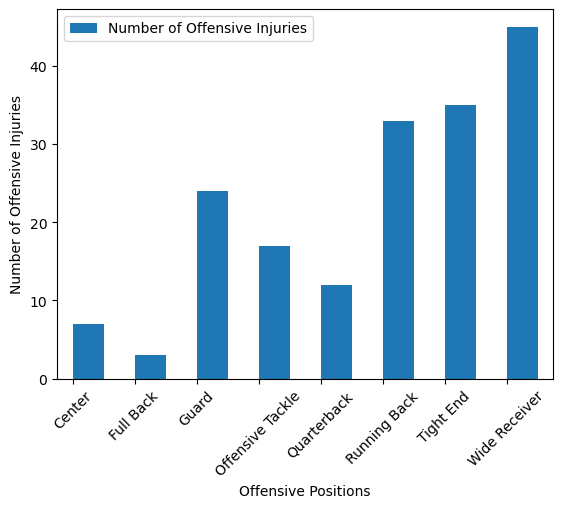

In [23]:
# Create the bar graph
bar_offense_injuries_df = offense_injuries_df.set_index("Offensive Position")
bar_offense_injuries_df.plot(kind="bar", xlabel="Offensive Positions", ylabel="Number of Offensive Injuries", rot=45, position=0)

In [24]:
# Create a dataframe with defensive positions only
defense_df = clean_df.loc[clean_df["Team Type"] == "defense"]
defense_df.head()

,Player,Team,Game,Date,Opposing Team,Position,Team Type,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
6,Shea McClellin,Chicago Bears,Houston Texans vs. Chicago Bears (11/11/2012),11/11/2012,Houston Texans,Defensive End,defense,No,No,10,2012,1,1.0,No,Concussion,1,27 downs,31.00 downs
13,Dwight Lowery,Jacksonville Jaguars,Seattle Seahawks vs. Jacksonville Jaguars (22/...,22/09/2013,Seattle Seahawks,Safety,defense,No,No,3,2013,1,13.0,No,Concussion,2,Did not return from injury,62.50 downs
18,William Middleton,Jacksonville Jaguars,Houston Texans vs. Jacksonville Jaguars (18/11...,18/11/2012,Houston Texans,Cornerback,defense,No,No,11,2012,1,6.0,No,Concussion,3,Did not return from injury,28.67 downs
21,K.J. Wright,Seattle Seahawks,Seattle Seahawks vs. Minnesota Vikings (4/11/2...,4/11/2012,Minnesota Vikings,Linebacker,defense,No,Yes,9,2012,1,1.0,No,Concussion,4,71 downs,73.75 downs
22,Reggie Walker,Arizona Cardinals,St. Louis Rams vs. Arizona Cardinals (4/10/2012),4/10/2012,St. Louis Rams,Linebacker,defense,No,No,5,2012,1,2.0,No,Head,4,20 downs,28.75 downs


In [25]:
# Determine the number of head injuries and concussions per position on defense
defense_injuries= defense_df.groupby(["Position"]).apply(lambda x: x[x["Team Type"] == "defense"]["Weeks Injured"].count())
defense_injuries

Position
Cornerback          52
Defensive End       18
Defensive Tackle    13
Linebacker          25
Safety              41
dtype: int64

In [26]:
# Put it in a dataframe
defense_injuries_df = pd.DataFrame(defense_injuries)
defense_injuries_df = defense_injuries_df.reset_index()
defense_injuries_df = defense_injuries_df.rename(columns = {"Position":"Defensive Position", 0:"Number of Defensive Injuries"})
defense_injuries_df

,Defensive Position,Number of Defensive Injuries
0,Cornerback,52
1,Defensive End,18
2,Defensive Tackle,13
3,Linebacker,25
4,Safety,41


<AxesSubplot:xlabel='Defensive Positions', ylabel='Number of Defensive Injuries'>

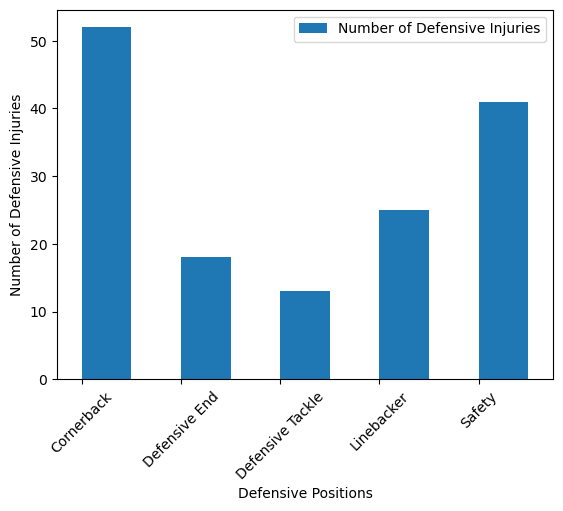

In [27]:
# Create the bar graph
bar_defense_injuries_df = defense_injuries_df.set_index("Defensive Position")
bar_defense_injuries_df.plot(kind="bar", xlabel="Defensive Positions", ylabel="Number of Defensive Injuries", rot=45, position=0)

In [28]:
# Combined both bar graphs
offense_injuries_df = offense_injuries_df.rename(columns={"Offensive Position":"Position"})
defense_injuries_df = defense_injuries_df.rename(columns={"Defensive Position":"Position"})


In [29]:
bar_injuries_df = pd.merge(offense_injuries_df, defense_injuries_df, how="outer", on="Position")
bar_injuries_df

,Position,Number of Offensive Injuries,Number of Defensive Injuries
0,Center,7.0,NaN
1,Full Back,3.0,NaN
2,Guard,24.0,NaN
3,Offensive Tackle,17.0,NaN
4,Quarterback,12.0,NaN
5,Running Back,33.0,NaN
6,Tight End,35.0,NaN
7,Wide Receiver,45.0,NaN
8,Cornerback,NaN,52.0
9,Defensive End,NaN,18.0


<AxesSubplot:xlabel='Team Positions', ylabel='Number of Injuries'>

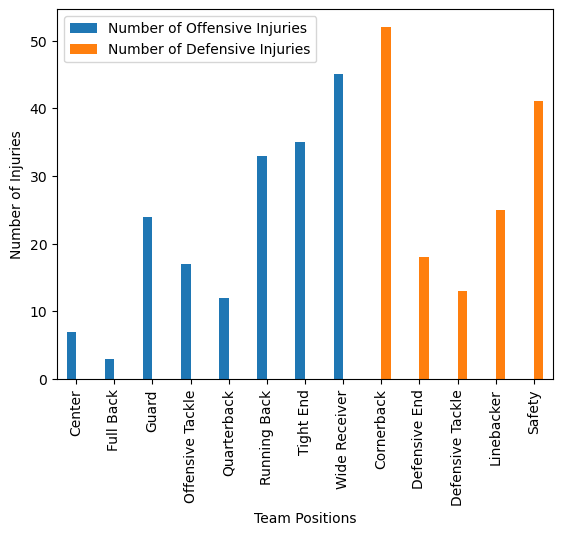

In [30]:
# Create the bar graph
bar_injuries_df = bar_injuries_df.set_index("Position")
bar_injuries_df.plot(kind="bar", xlabel="Team Positions", ylabel="Number of Injuries", position=0.5)

In [31]:
clean_df

,Player,Team,Game,Date,Opposing Team,Position,Team Type,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
0,Aldrick Robinson,Washington Redskins,Washington Redskins vs. Tampa Bay Buccaneers (...,30/09/2012,Tampa Bay Buccaneers,Wide Receiver,offense,No,Yes,4,2012,1,1.0,No,Head,0,14 downs,37.00 downs
1,D.J. Fluker,San Diego Chargers,Tennessee Titans vs. San Diego Chargers (22/9/...,22/09/2013,Tennessee Titans,Offensive Tackle,offense,No,No,3,2013,1,1.0,No,Concussion,0,78 downs,73.50 downs
2,Marquise Goodwin,Buffalo Bills,Houston Texans vs. Buffalo Bills (28/9/2014),28/09/2014,Houston Texans,Wide Receiver,offense,No,No,4,2014,1,1.0,No,Concussion,0,25 downs,17.50 downs
3,Bryan Stork,New England Patriots,New England Patriots vs. Buffalo Bills (12/10/...,12/10/2014,Buffalo Bills,Center,offense,No,Yes,6,2014,1,1.0,No,Head,0,82 downs,41.50 downs
4,Daniel Kilgore,San Francisco 49ers,San Francisco 49ers vs. Arizona Cardinals (29/...,29/10/2012,Arizona Cardinals,Guard,offense,No,Yes,8,2012,1,0.0,No,Concussion,1,8 downs,14.43 downs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Eric Weddle,San Diego Chargers,Baltimore Ravens vs. San Diego Chargers (25/11...,25/11/2012,Baltimore Ravens,Safety,defense,No,No,12,2012,1,0.0,No,Concussion,85,90 downs,76.00 downs
321,Blidi Wreh-Wilson,Tennessee Titans,Indianapolis Colts vs. Tennessee Titans (28/9/...,28/09/2014,Indianapolis Colts,Cornerback,defense,No,No,4,2014,1,1.0,No,Concussion,85,90 downs,78.00 downs
322,Josh Sitton,Green Bay Packers,Green Bay Packers vs. Tennessee Titans (23/12/...,23/12/2012,Tennessee Titans,Guard,offense,No,Yes,16,2012,1,0.0,No,Concussion,87,70 downs,73.64 downs
323,Nate Solder,New England Patriots,New England Patriots vs. Cleveland Browns (8/1...,8/12/2013,Cleveland Browns,Offensive Tackle,offense,No,Yes,14,2013,1,0.0,No,Concussion,87,52 downs,78.83 downs


In [32]:
# Create a bar graph that shows offensive and defensive number of injuries
number_injuries_df = pd.DataFrame(clean_df["Team Type"].value_counts())
number_injuries_df = number_injuries_df.rename(columns={"Team Type":"Number of Injuries"})
number_injuries_df

,Number of Injuries
offense,176
defense,149


In [40]:
stats.ttest_ind(defense_df["Games Missed"], offense_df["Games Missed"], equal_var=False)
#Not statistically significant difference in number of games missed

Ttest_indResult(statistic=-1.7650938173235642, pvalue=0.07849418146862482)

In [47]:
defense_df

,Player,Team,Game,Date,Opposing Team,Position,Team Type,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
6,Shea McClellin,Chicago Bears,Houston Texans vs. Chicago Bears (11/11/2012),11/11/2012,Houston Texans,Defensive End,defense,No,No,10,2012,1,1.0,No,Concussion,1,27 downs,31.00 downs
13,Dwight Lowery,Jacksonville Jaguars,Seattle Seahawks vs. Jacksonville Jaguars (22/...,22/09/2013,Seattle Seahawks,Safety,defense,No,No,3,2013,1,13.0,No,Concussion,2,Did not return from injury,62.50 downs
18,William Middleton,Jacksonville Jaguars,Houston Texans vs. Jacksonville Jaguars (18/11...,18/11/2012,Houston Texans,Cornerback,defense,No,No,11,2012,1,6.0,No,Concussion,3,Did not return from injury,28.67 downs
21,K.J. Wright,Seattle Seahawks,Seattle Seahawks vs. Minnesota Vikings (4/11/2...,4/11/2012,Minnesota Vikings,Linebacker,defense,No,Yes,9,2012,1,1.0,No,Concussion,4,71 downs,73.75 downs
22,Reggie Walker,Arizona Cardinals,St. Louis Rams vs. Arizona Cardinals (4/10/2012),4/10/2012,St. Louis Rams,Linebacker,defense,No,No,5,2012,1,2.0,No,Head,4,20 downs,28.75 downs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,A.J. Jefferson,Minnesota Vikings,Minnesota Vikings vs. Chicago Bears (9/12/2012),9/12/2012,Chicago Bears,Cornerback,defense,No,Yes,14,2012,1,0.0,No,Concussion,81,84 downs,40.00 downs
319,T.J. McDonald,St. Louis Rams,St. Louis Rams vs. Seattle Seahawks (19/10/2014),19/10/2014,Seattle Seahawks,Safety,defense,No,Yes,7,2014,1,0.0,No,Concussion,82,75 downs,73.60 downs
320,Eric Weddle,San Diego Chargers,Baltimore Ravens vs. San Diego Chargers (25/11...,25/11/2012,Baltimore Ravens,Safety,defense,No,No,12,2012,1,0.0,No,Concussion,85,90 downs,76.00 downs
321,Blidi Wreh-Wilson,Tennessee Titans,Indianapolis Colts vs. Tennessee Titans (28/9/...,28/09/2014,Indianapolis Colts,Cornerback,defense,No,No,4,2014,1,1.0,No,Concussion,85,90 downs,78.00 downs


In [57]:
#merged_df=pd.merge(offense_df["Team Type"], defense_df["Team Type"], on="Games Missed", how="outer")

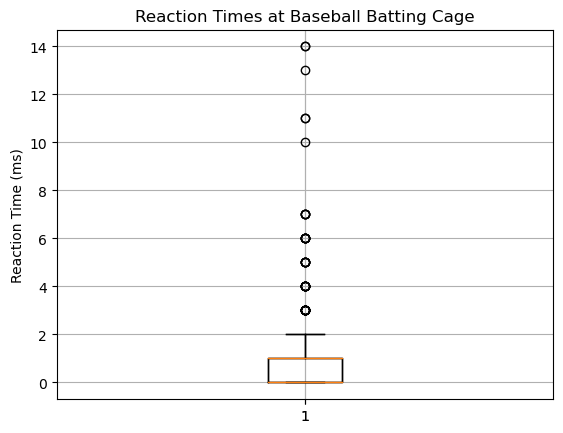

In [53]:
fig, ax = plt.subplots()

ax.boxplot(offense_df["Games Missed"])
ax.set_title('Reaction Times at Baseball Batting Cage')
ax.set_ylabel('Reaction Time (ms)')

plt.grid()
plt.show()

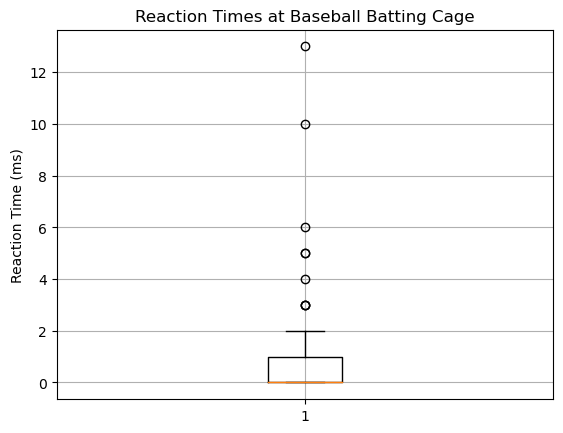

In [58]:
fig, ax = plt.subplots()

ax.boxplot(defense_df["Games Missed"])
ax.set_title('Reaction Times at Baseball Batting Cage')
ax.set_ylabel('Reaction Time (ms)')

plt.grid()
plt.show()

In [51]:
defense_df["Games Missed"].plot(kind="box plot")

ValueError: box plot is not a valid plot kind

<AxesSubplot: xlabel='Team Types', ylabel='Number of Injuries'>

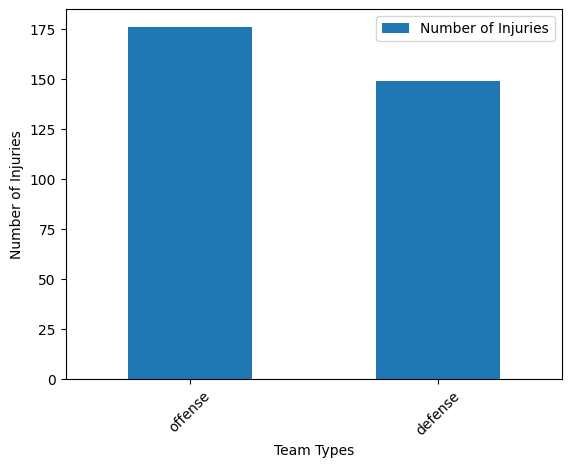

In [332]:
# Create the bar graph
number_injuries_df.plot(kind="bar", xlabel="Team Types", ylabel="Number of Injuries", rot=45, position=0.5)

# Number of concussions and head injuries per year